### Data Quality Report

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('applications data.csv')
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [3]:
df['date'] =  pd.to_datetime(df['date'],format='%Y%m%d')
df['dob'] =  pd.to_datetime(df['dob'],format='%Y%m%d')

In [4]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['# of records'] = df.notnull().sum().values
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, '% populated'] = round(summary['# of records']/(summary['# of records']+summary['Missing'])*100)
        summary.loc[summary['Name'] == name,'Most Common Field Value']=df[name].value_counts().index[0]

    return summary

In [5]:
summary = resumetable(df)
summary.to_excel('summary.xlsx')

Dataset Shape: (1000000, 10)


In [6]:
#group date into weekday
df1=df.copy()
df1['weekday_num'] = pd.DatetimeIndex(df['date']).weekday
df1['weekday_name'] = pd.DatetimeIndex(df['date']).day_name()
df_grouped = (df1.groupby(['weekday_num', 'weekday_name']).size().reset_index(name="count"))
df_grouped

,weekday_num,weekday_name,count
0,0,Monday,139642
1,1,Tuesday,143008
2,2,Wednesday,142235
3,3,Thursday,142699
4,4,Friday,145015
5,5,Saturday,145067
6,6,Sunday,142334


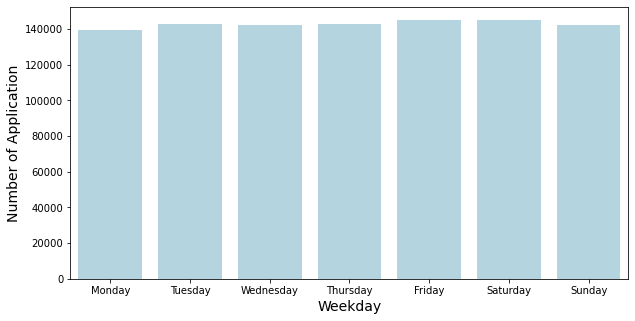

In [7]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='weekday_name',y='count',ax=ax,data=df_grouped,color='lightblue')
a.set_xlabel("Weekday",fontsize=14)
a.set_ylabel("Number of Application",fontsize=14)
a.tick_params(labelsize=10)

plt.show()

In [8]:
# group date into month
df_month = df1.groupby(df1['date'].dt.to_period('m')).size().reset_index(name="count")

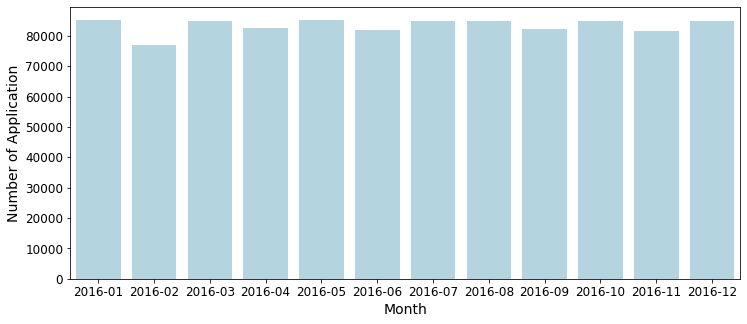

In [9]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='date',y='count',ax=ax,data=df_month,color='lightblue')
a.set_xlabel("Month",fontsize=14)
a.set_ylabel("Number of Application",fontsize=14)
a.tick_params(labelsize=12)

plt.show()

In [10]:
df_day = df1.groupby(df1['date'].dt.day).size().reset_index(name="count")

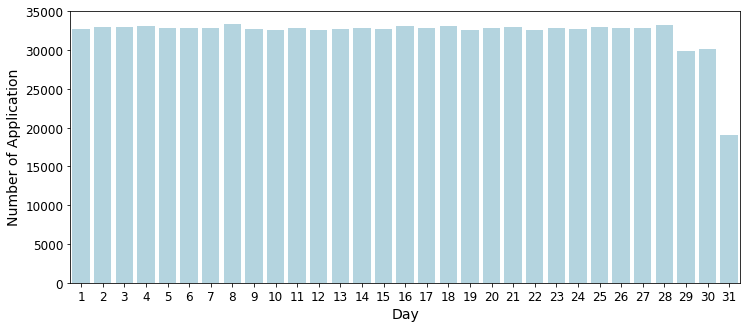

In [11]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='date',y='count',ax=ax,data=df_day,color='lightblue')
a.set_xlabel("Day",fontsize=14)
a.set_ylabel("Number of Application",fontsize=14)
a.tick_params(labelsize=12)

plt.show()

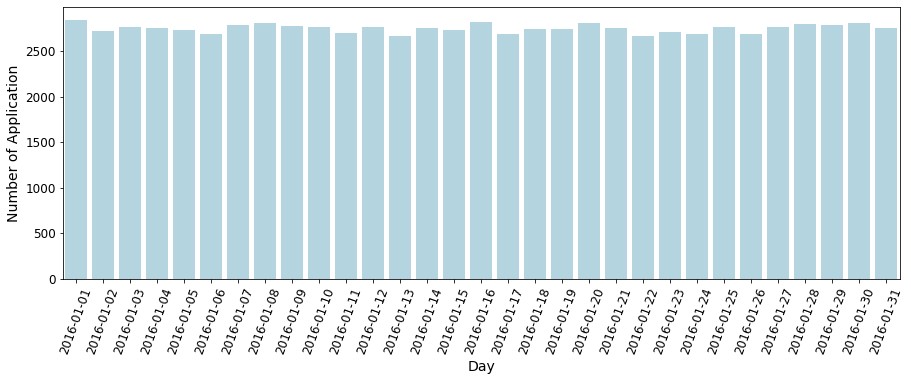

In [12]:

df_day1 = df1.groupby(df1['date'].dt.date).size().reset_index(name="count")
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='date',y='count',ax=ax,data=df_day1.head(31),color='lightblue')
a.set_xlabel("Day",fontsize=14)
a.set_ylabel("Number of Application",fontsize=14)
a.tick_params(labelsize=12)
plt.xticks(rotation=70)
plt.show()

In [13]:
#ssn
df_ssn = df1.groupby('ssn').size().reset_index(name='count')
df_ssn = df_ssn.sort_values(by='count',ascending=False).reset_index()
df_ssn=df_ssn.drop('index',axis=1).head(10)

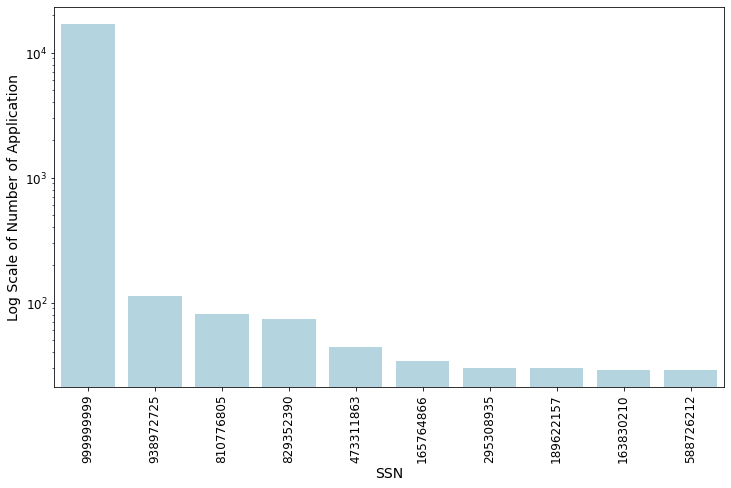

In [14]:
fig_dims = (12, 7)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='ssn',y='count',ax=ax,data=df_ssn,color='lightblue',order = df_ssn['ssn'])
a.set_xlabel("SSN",fontsize=14)
a.set_ylabel("Log Scale of Number of Application",fontsize=14)
a.tick_params(labelsize=12)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [15]:
#firstname
df_fn = df1.groupby('firstname').size().reset_index(name='count')
df_fn = df_fn.sort_values(by='count',ascending=False).reset_index()
df_fn=df_fn.drop('index',axis=1).head(20)
df_fn

,firstname,count
0,EAMSTRMT,12658
1,TXEMXZZM,10297
2,UXXJJZTUZ,10235
3,UJSRSMUEZ,9994
4,SREZUJMJU,9688
5,EASEXMJAT,7576
6,SSSXUEJMS,6923
7,SZUASTTA,6878
8,EREMTZXXA,6717
9,EAXRRUMUX,5686


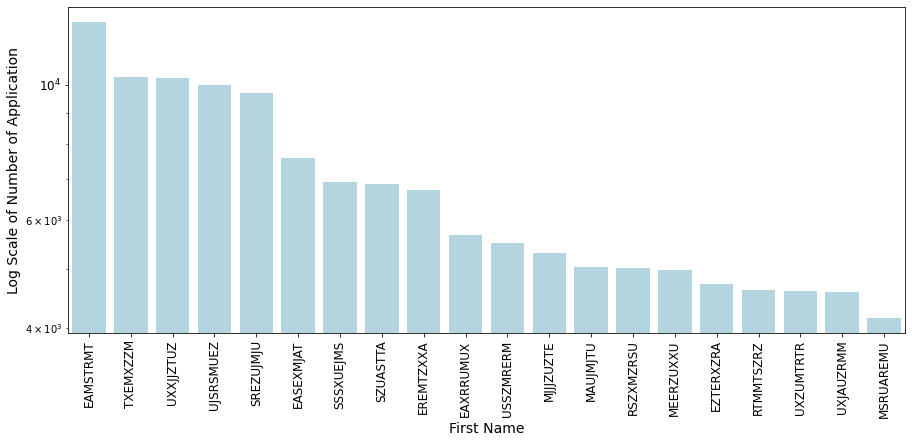

In [16]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='firstname',y='count',ax=ax,data=df_fn,color='lightblue',order = df_fn['firstname'])
a.set_xlabel("First Name",fontsize=14)
a.set_ylabel("Log Scale of Number of Application",fontsize=14)
a.tick_params(labelsize=12)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [17]:
#lastname
df_ln = df1.groupby('lastname').size().reset_index(name='count')
df_ln = df_ln.sort_values(by='count',ascending=False).reset_index()
df_ln=df_ln.drop('index',axis=1).head(20)

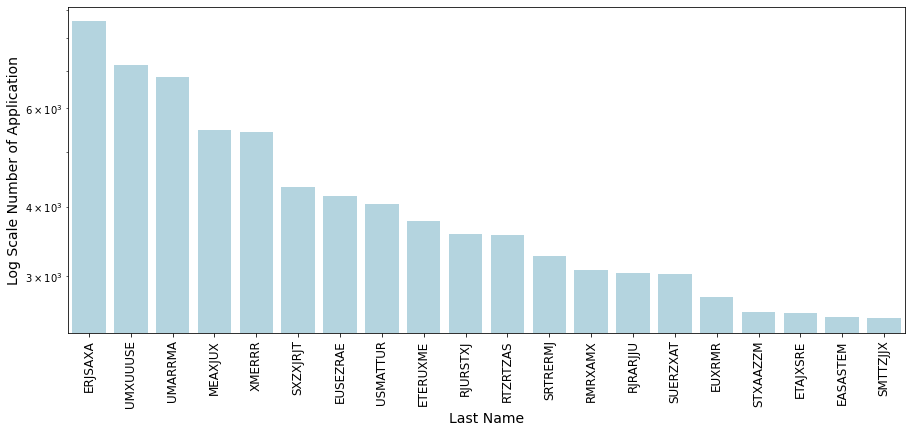

In [18]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='lastname',y='count',ax=ax,data=df_ln,color='lightblue',order = df_ln['lastname'])
a.set_xlabel("Last Name",fontsize=14)
a.set_ylabel("Log Scale Number of Application",fontsize=14)
a.tick_params(labelsize=12)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [19]:
#address
df_ad = df1.groupby('address').size().reset_index(name='count')
df_ad = df_ad.sort_values(by='count',ascending=False).reset_index()
df_ad=df_ad.drop('index',axis=1).head(20)
df_ad

,address,count
0,123 MAIN ST,1079
1,1775 XJXE LN,97
2,7433 RAEZA ST,80
3,8911 MZSU DR,74
4,4907 RRAAU DR,73
5,426 XUAXZ BLVD,57
6,3545 ARMA ST,44
7,606 EZZAU WY,44
8,4530 ETSMX WY,42
9,4292 RUSMM LN,41


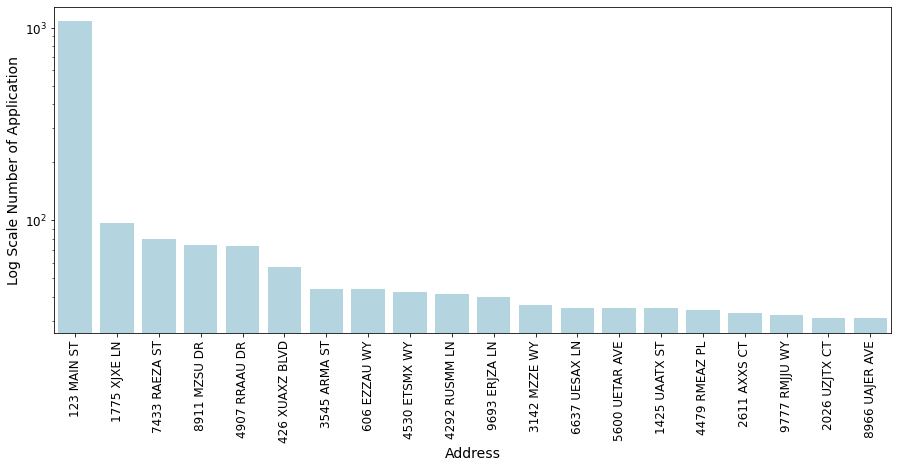

In [20]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='address',y='count',ax=ax,data=df_ad,color='lightblue',order = df_ad['address'])
a.set_xlabel("Address",fontsize=14)
a.set_ylabel("Log Scale Number of Application",fontsize=14)
a.tick_params(labelsize=12)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [21]:
#zip5
df_z = df1.groupby('zip5').size().reset_index(name='count')
df_z = df_z.sort_values(by='count',ascending=False).reset_index()
df_z=df_z.drop('index',axis=1).head(20)
df_z

,zip5,count
0,68138,823
1,90042,514
2,89835,489
3,35227,478
4,14931,459
5,86500,438
6,12700,436
7,1362,434
8,59695,432
9,52317,432


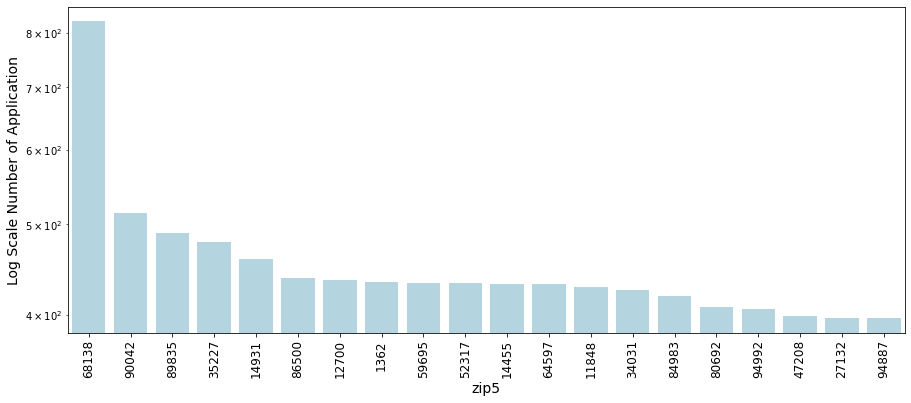

In [22]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='zip5',y='count',ax=ax,data=df_z,color='lightblue',order = df_z['zip5'])
a.set_xlabel("zip5",fontsize=14)
a.set_ylabel("Log Scale Number of Application",fontsize=14)
a.tick_params(labelsize=12)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [23]:
#dob
df_dob = df1.groupby(df1['dob'].dt.date).size().reset_index(name='count')
#df_dob = df_dob.sort_values(by='count',ascending=False).reset_index()
#df_dob=df_dob.drop('index',axis=1).head(30)
df_dob = df_dob.head(20)

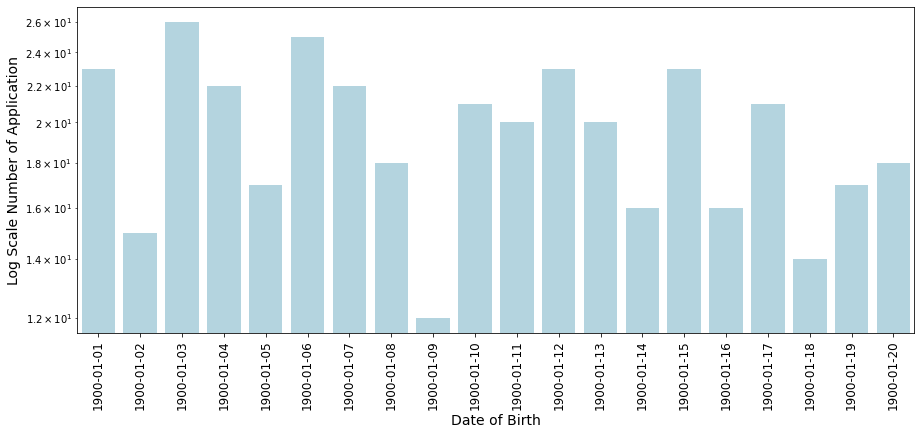

In [24]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='dob',y='count',ax=ax,data=df_dob,color='lightblue',order = df_dob['dob'])
a.set_xlabel("Date of Birth",fontsize=14)
a.set_ylabel("Log Scale Number of Application",fontsize=14)
a.tick_params(labelsize=12)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [25]:
#homephone
df_phone = df1.groupby(df1['homephone']).size().reset_index(name='count')
df_phone = df_phone.sort_values(by='count',ascending=False).reset_index()
df_phone=df_phone.drop('index',axis=1).head(30)
df_phone

,homephone,count
0,9999999999,78512
1,6384782007,466
2,6035129044,360
3,2113738531,331
4,4024680535,198
5,2669445638,172
6,6637507363,169
7,8629049955,139
8,3364980740,110
9,6845279110,108


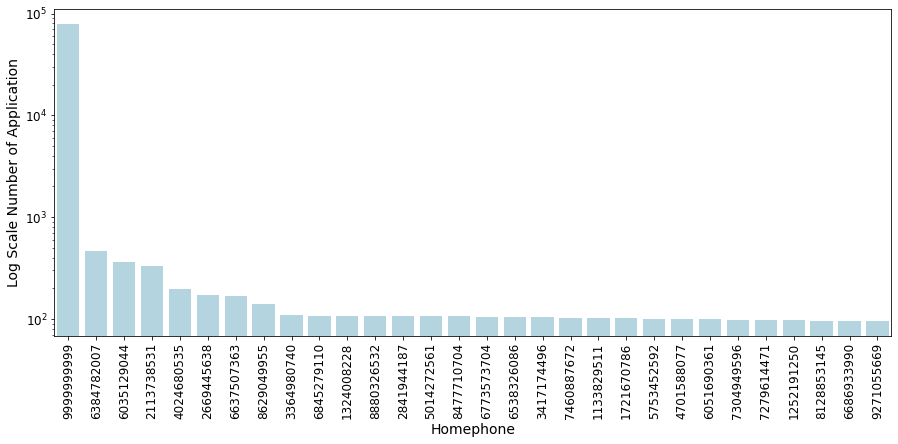

In [26]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='homephone',y='count',ax=ax,data=df_phone,color='lightblue',order = df_phone['homephone'])
a.set_xlabel("Homephone",fontsize=14)
a.set_ylabel("Log Scale Number of Application",fontsize=14)
a.tick_params(labelsize=12)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

In [27]:
#fraud score
df_fraud = df1.groupby(df1['fraud_label']).size().reset_index(name='count')
#df_fraud = df_fraud.sort_values(by='count',ascending=False).reset_index()
#df_fraud=df_fraud.drop('index',axis=1).head(30)
df_fraud

,fraud_label,count
0,0,985607
1,1,14393


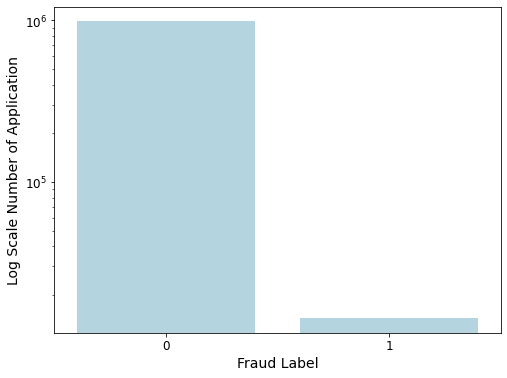

In [28]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
a = sns.barplot(x='fraud_label',y='count',ax=ax,data=df_fraud,color='lightblue',order = df_fraud['fraud_label'])
a.set_xlabel("Fraud Label",fontsize=14)
a.set_ylabel("Log Scale Number of Application",fontsize=14)
a.tick_params(labelsize=12)
ax.set_yscale('log')
plt.show()